# Q1

(a)

In [27]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
!git clone https://github.com/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024

'git' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [28]:
# spin configurations
df1 = pd.read_csv("AF_conf.csv",header=None)
# temperature
df2 = pd.read_csv("AF_temp.csv",header=None)
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x = df1
t = df2
t = t.T


In [29]:
z = np.zeros((4800,100))
x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)
print(x_mean.shape,x_std.shape)
for i in range(100):
  z[:,i]=(x_mean[i]-x[:,i])/x_std[i]

(100,) (100,)


In [30]:
cov = np.cov(z,rowvar=False)

In [31]:
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
# sigma is eigenvalue, U is eigenvector
#print(U)

In [32]:
def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

[[ 3.11324412e+00 -5.01557622e-01  2.31839543e+00]
 [-1.97546687e+00 -1.55330354e+00 -1.15940737e+00]
 [-3.98984521e+00  1.19800430e+00 -3.31378779e+00]
 ...
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]
 [ 8.38991232e+00 -6.95195284e-03 -5.27614401e-03]]


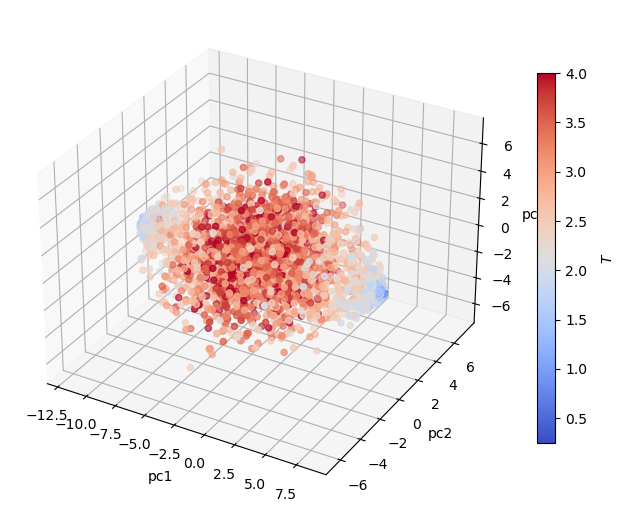

In [33]:
reducevec, vari = reduce_system(U,3)
print(reducevec)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
p=ax.scatter(reducevec[:,0],reducevec[:,1],reducevec[:,2],c=t,cmap="coolwarm")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
cb = fig.colorbar(p,shrink=0.6)
cb.set_label(label='$T$',labelpad=10)

(b)

In [34]:
from numpy import random
from more_itertools import locate
from copy import deepcopy
centroid=np.random.random((3,3))
centroid_new=np.random.random((3,3))
x_pc=np.array([reducevec[:,0],reducevec[:,1],reducevec[:,2]]).T

In [35]:
cluster=np.zeros((4800,1))
r=np.zeros((3,1))
group=range(3)
while True :
    r_sum=0
    for j in range(4800):
        for k in range(3):
            r[k]=np.linalg.norm(x_pc[j,:]-centroid[k,:],2)
        cluster[j]=group[list(r).index(min(r))]
        r_sum=r_sum+min(r)
    for k in range(3):
        centroid_new[k,:]=np.mean(x_pc[[i for i in range(4800) if cluster[i]==k]],0)
    print(r_sum/4800)
    if ((centroid_new-centroid)==np.zeros(np.shape(centroid))).all():
        break
    centroid=deepcopy(centroid_new)


[6.98091188]
[2.91522582]
[2.29210891]
[2.14081746]
[2.09103297]
[2.08322786]
[2.07261522]
[2.08052042]


Text(0.5, 0, 'pc3')

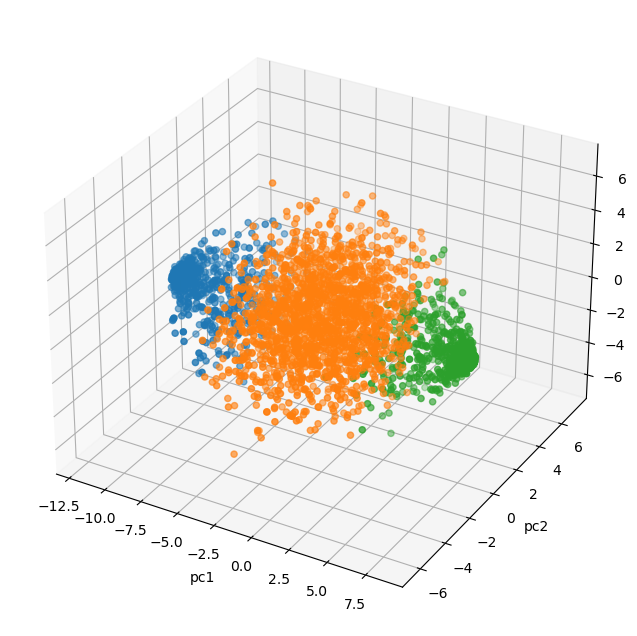

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
for k in range(3):
  p=ax.scatter(reducevec[[i for i in range(4800) if cluster[i]==k],0],reducevec[[i for i in range(4800) if cluster[i]==k],1],reducevec[[i for i in range(4800) if cluster[i]==k],2])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')



(c)

Text(0.5, 1.0, 'pc1')

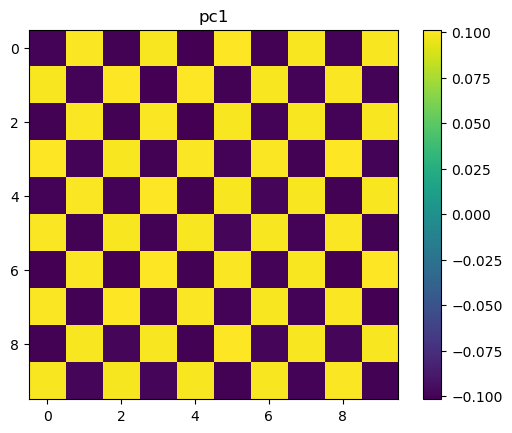

In [37]:
plt.imshow(U[:,0].reshape((10,10)))
plt.colorbar()
plt.title('pc1')

Text(0.5, 1.0, 'pc2')

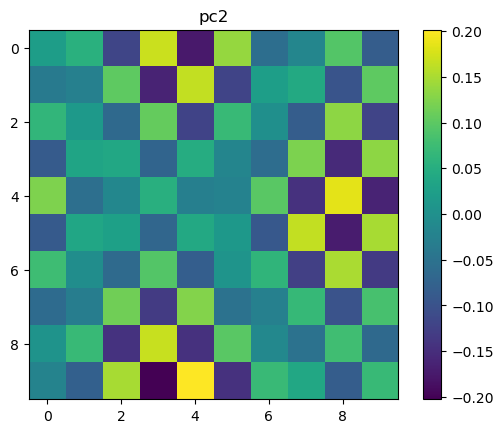

In [38]:
plt.imshow(U[:,1].reshape((10,10)))
plt.colorbar()
plt.title('pc2')

# Q2

In [39]:
# spin configurations
df_L6 = pd.read_csv("F_conf_L6.csv",header=None)
df_L8 = pd.read_csv("F_conf_L8.csv",header=None)
df_L10 = pd.read_csv("F_conf_L10.csv",header=None)
# temperature
df_T = pd.read_csv("F_temp.csv",header=None)
x_L6 = df_L6.to_numpy()
x_L8 = df_L8.to_numpy()
x_L10 = df_L10.to_numpy()
t = df_T.to_numpy().T
T_list=np.arange(0.25,4.1,0.25)
print(x_L6)
print(T_list)


    

[[-1  1 -1 ...  1  1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1  1 -1 ...  1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.  ]


In [40]:
m6=[]
m8=[]
m10=[]
for i in range(len(T_list)):
  t_temp=T_list[i]
  I=np.where(t==t_temp)[1]
  m6.append(np.mean(abs(np.mean(x_L6[I,:],axis=1))))
  m8.append(np.mean(abs(np.mean(x_L8[I,:],axis=1))))
  m10.append(np.mean(abs(np.mean(x_L10[I,:],axis=1))))


 

In [41]:
T_plot=np.arange(0.0001,4.0001,0.0001)
minf=[]
for i in range(len(T_plot)):
  t_temp=T_plot[i]
  if t_temp<=2.269:
    minf.append((1-1/np.sinh(2/t_temp)**4)**(1/8))
  else:
    minf.append(0)

C:\Users\minlo\AppData\Local\Temp\ipykernel_5916\1333726417.py:6: RuntimeWarning: overflow encountered in sinh
  minf.append((1-1/np.sinh(2/t_temp)**4)**(1/8))
C:\Users\minlo\AppData\Local\Temp\ipykernel_5916\1333726417.py:6: RuntimeWarning: overflow encountered in scalar power
  minf.append((1-1/np.sinh(2/t_temp)**4)**(1/8))


Text(0, 0.5, '$\\langle m \\rangle$')

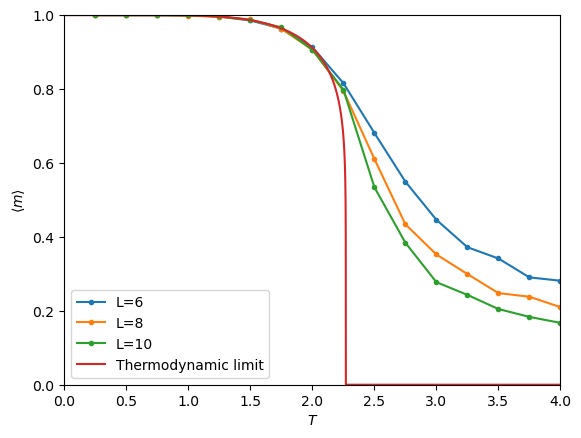

In [42]:
plt.plot(T_list,m6,'.-',label='L=6')
plt.plot(T_list,m8,'.-',label='L=8')
plt.plot(T_list,m10,'.-',label='L=10')
plt.plot(T_plot,minf,label='Thermodynamic limit')
#plt.axvline(2.269,linestyle = '--')
plt.xlim((0,4))
plt.ylim((0,1))
plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle m \rangle$')